## Calories Burnt Predictor

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1. Problem statement
- This project aimed to predict calories burnt during exercise using various features.


### 2. Data Collection
- Dataset Source - [https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction](https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction)
- The data consists of 9 column and 15000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/calories.csv')

#### Show Top 5 Records

In [3]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


#### Shape of the dataset

In [4]:
df.shape

(15000, 9)

### 2.2 Dataset information

- User ID
- Gender
- Age
- Height
- Weight
- Duration
- Heart Rate
- Body Temperature
- Calories

In [5]:
df = df.drop(labels=['User_ID'],axis=1)

### 2.3 Drop id column as it is statistically insignificant

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

1

In [8]:
df = df.drop_duplicates()

#### Now, there are no duplicates  values in the data set

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      14999 non-null  object 
 1   Age         14999 non-null  int64  
 2   Height      14999 non-null  float64
 3   Weight      14999 non-null  float64
 4   Duration    14999 non-null  float64
 5   Heart_Rate  14999 non-null  float64
 6   Body_Temp   14999 non-null  float64
 7   Calories    14999 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.0+ MB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

Gender          2
Age            60
Height         90
Weight         91
Duration       30
Heart_Rate     59
Body_Temp      45
Calories      277
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,14999.0,42.790786,16.980401,20.0,28.0,39.0,56.0,79.0
Height,14999.0,174.465831,14.258333,123.0,164.0,175.0,185.0,222.0
Weight,14999.0,74.967931,15.035593,36.0,63.0,74.0,87.0,132.0
Duration,14999.0,15.531035,8.319310,1.0,8.0,16.0,23.0,30.0
Heart_Rate,14999.0,95.518901,9.583542,67.0,88.0,96.0,103.0,128.0
Body_Temp,14999.0,40.025488,0.779244,37.1,39.6,40.2,40.6,41.5
Calories,14999.0,89.542836,62.457750,1.0,35.0,79.0,138.0,314.0


### 3.6 Exploring Data

In [12]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [13]:
print("Categories in 'Gender' variable:     ",end=" " )
print(df['Gender'].unique())

Categories in 'Gender' variable:      ['male' 'female']


In [14]:
# define numerical & categorical columns
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical columns : {}'.format(len(numerical_columns), numerical_columns))
print('\nWe have {} categorical columns : {}'.format(len(categorical_columns), categorical_columns))

We have 7 numerical columns : ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

We have 1 categorical columns : ['Gender']


### 4. Data Visualisation
#### 4.1 Univariate Analysis 
- Histogram

#### 4.1.1 Univariate Analysis of Numerical Variables

<Figure size 1000x1000 with 0 Axes>

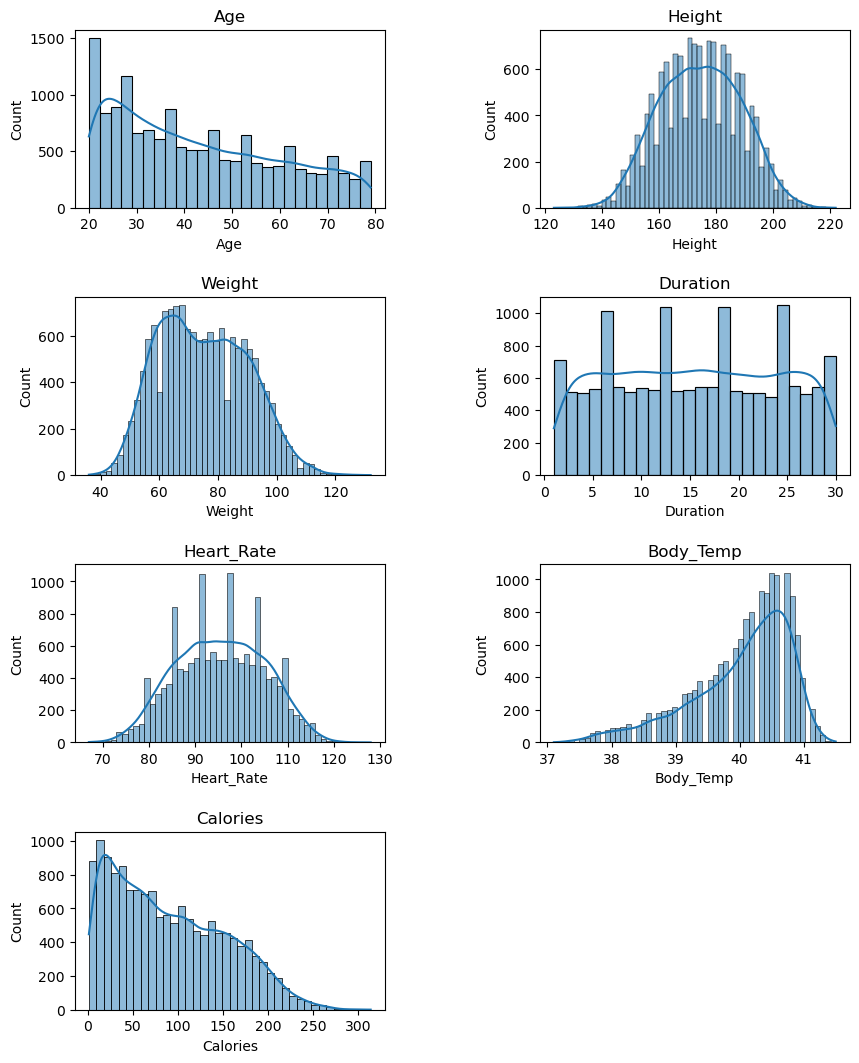

In [15]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.5)
n_cols = 2 
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.5, wspace=0.5)
axes = axes.flatten()
for idx, i in enumerate(numerical_columns):
    sb.histplot(data=df, x=i, kde=True, ax=axes[idx])
    axes[idx].set_title(i)
for j in range(len(numerical_columns), len(axes)):
    axes[j].set_visible(False)
plt.show()

#### 4.1.2 Univariate analysis for Categorical Variables

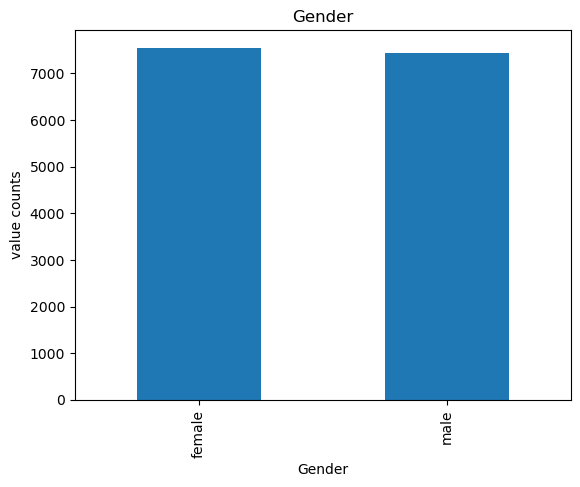

In [16]:
for i in categorical_columns:
    df[i].value_counts().plot(kind='bar', xlabel = i , ylabel='value counts', title = i)
    print('\n')
    plt.show()

#### 4.2 Bivariate Analysis 
- Correlation heatmap
- Pairplot
- Boxplot

#### 4.2.1 Correlation heatmap

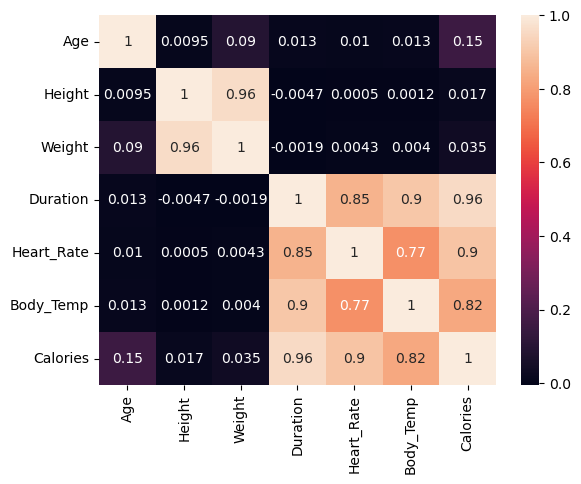

In [17]:
sb.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

#### 4.2.2 Pairplot

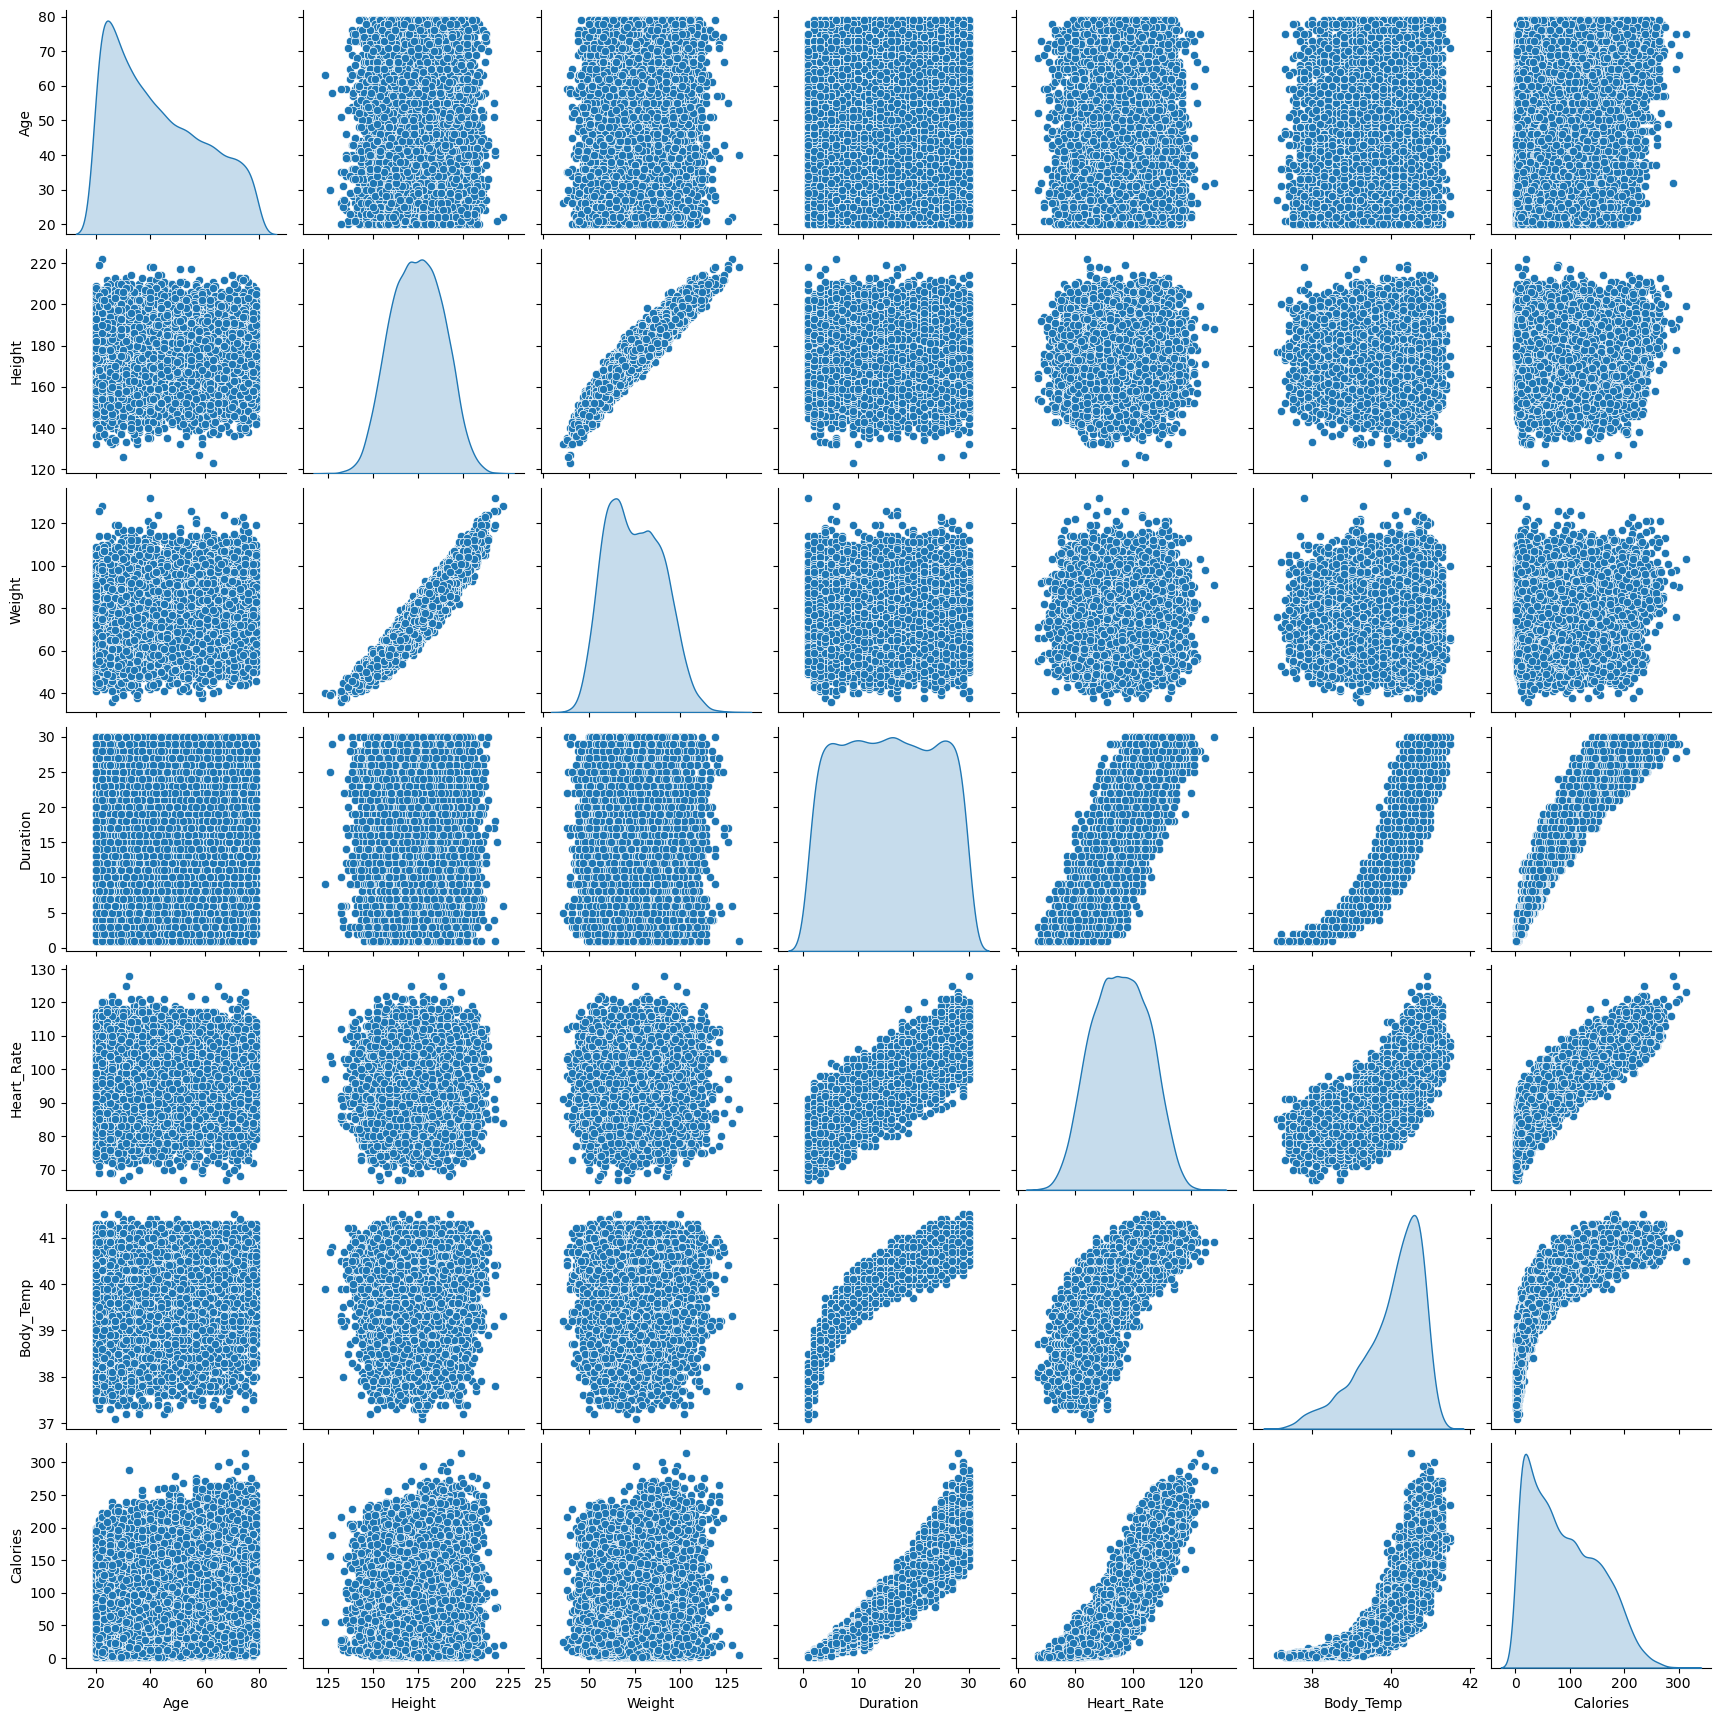

In [18]:
sb.pairplot(df,diag_kind='kde')
plt.show()

#### 4.2.3 Categorical Features vs Target Feature Price Boxplot

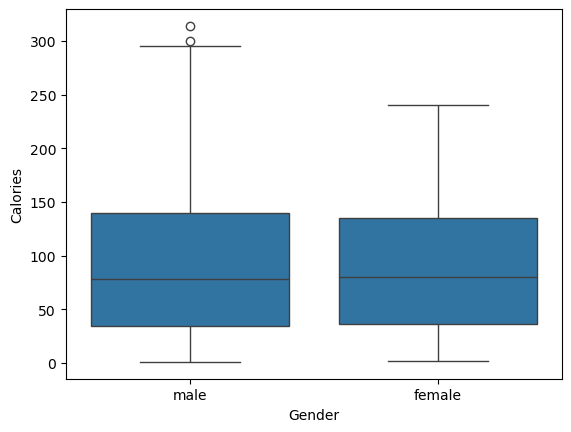

In [19]:
for i in categorical_columns:
    sb.boxplot(data=df, x=i , y='Calories')
    plt.show()

### 5. Ordinal Mapping of categorical features


#### 5.1 Creating Mapper for each categorical variable

In [20]:
Gender_mapper = {"male": 0, "female": 1}

#### 5.2 Applying the mapper to the dataframe

In [21]:
df['Gender'] = df['Gender'].replace(Gender_mapper)

In [22]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## 6. Mutual Information Scores

#### 6.1 Seperating X and Y

In [23]:
X = df.drop(labels=['Calories'],axis=1)
Y = df[['Calories']]

#### 6.2 Calculating Mutual Information scores for regression

In [24]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X,Y.values.flatten(),random_state=42)
mi_scores = pd.Series(mi_scores, name="MI Scores",index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [25]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    plt.show()

#### 6.3 Visualizing Mutual Information Scores

Duration      1.515941
Body_Temp     0.990395
Heart_Rate    0.877684
Age           0.025639
Weight        0.017669
Height        0.009392
Gender        0.008655
Name: MI Scores, dtype: float64


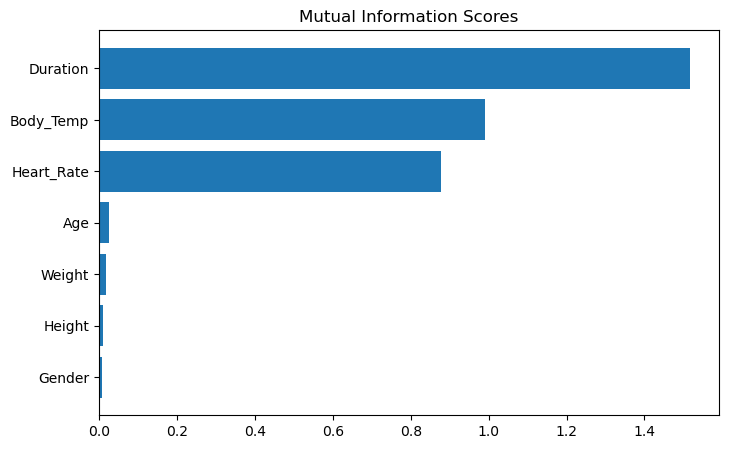

In [26]:
print(mi_scores)
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

Above shows that Duration, Body Temperature & Heart Rate are most important features to predict the Calories burnt.